In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import cv2
import albumentations as A

In [22]:
%matplotlib qt

# Load some samples

In [2]:
DATA_PATH = '../data/brain_images/'

subjects = [i for i in os.listdir(DATA_PATH) if i.find('.')==-1]



/home/dmitriishubin/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


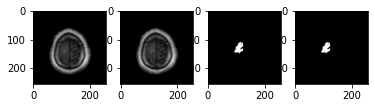

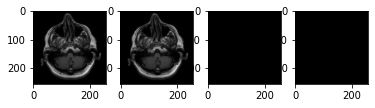

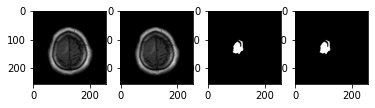

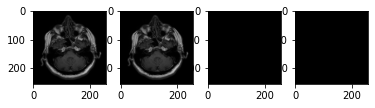

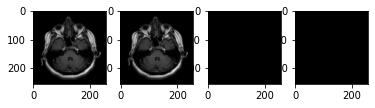

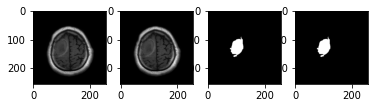

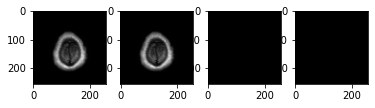

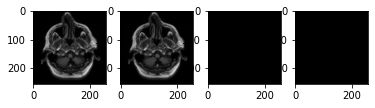

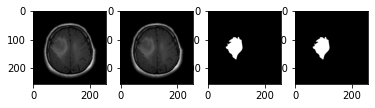

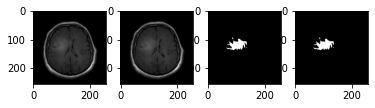

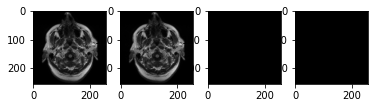

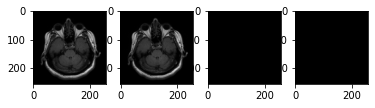

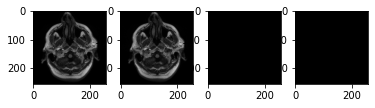

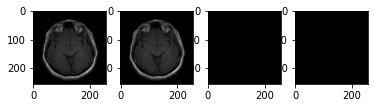

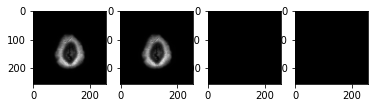

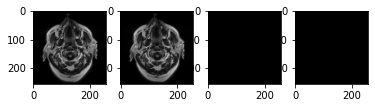

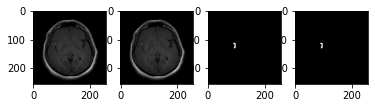

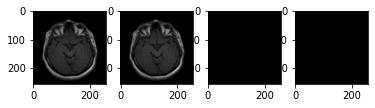

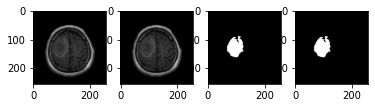

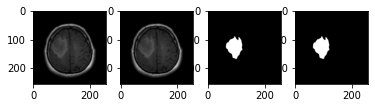

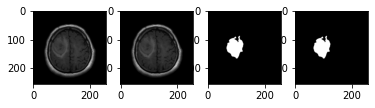

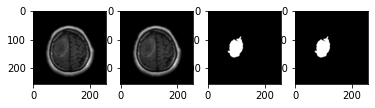

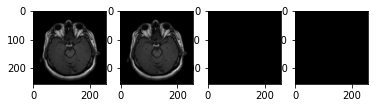

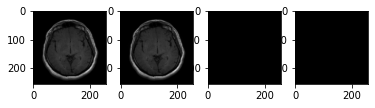

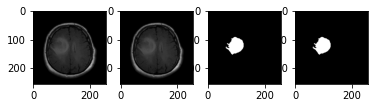

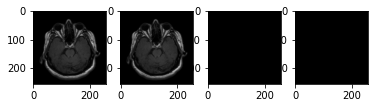

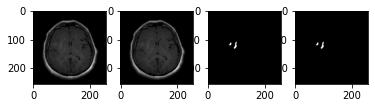

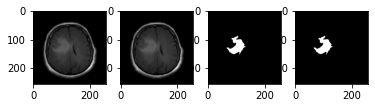

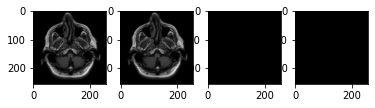

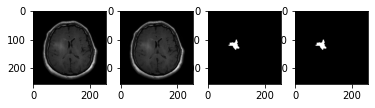

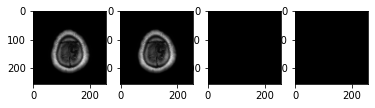

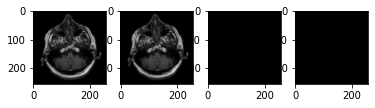

In [18]:
subject = subjects[19]

images = [i[:-4] for i in os.listdir(DATA_PATH+subject) if i.find('_mask')==-1]
for image in images:
    mask=cv2.imread(DATA_PATH+subject+'/'+image+'_mask.tif',cv2.IMREAD_COLOR)
    image=cv2.imread(DATA_PATH+subject+'/'+image+'.tif',cv2.IMREAD_COLOR)


    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    image= (image/255)**(1.5)
    
    aug = A.CenterCrop(p=1, height=image.shape[0], width=image.shape[0])

    augmented = aug(image=image, mask=mask)

    image_aug = augmented['image']
    mask_aug = augmented['mask']
    
    f, axarr = plt.subplots(1,4) 
    axarr[0].imshow(image, cmap='gray')
    axarr[1].imshow(image_aug, cmap='gray')
    axarr[2].imshow(mask, cmap='gray')
    axarr[3].imshow(mask_aug, cmap='gray')
